<a href="https://colab.research.google.com/github/sftSalman/tensoflowMaster/blob/main/complexModelUsingModelClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input,concatenate
from tensorflow.keras.models import Model
from tensorflow.nn import relu
from tensorflow.python.keras.utils.vis_utils import plot_model

In [11]:
!pip install tensorflow==2.3.0.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320.4 MB 51 kB/s 
     |████████████████████████████████| 2.9 MB 18.4 MB/s 
     |████████████████████████████████| 20.1 MB 1.3 MB/s 
     |████████████████████████████████| 459 kB 75.7 MB/s 
     |████████████████████████████████| 26.1 MB 1.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
  

In [12]:
input_r = Input(shape=(1,),name='input_right')
input_l = Input(shape=(1,),name='input_left')

hidden_1 = Dense(units=30,activation='relu',name='hidden_1')(input_r)
hidden_2 = Dense(30,activation='relu', name ='hidden_2')(hidden_1)

concat = concatenate([input_l,hidden_2], name='cancateneta')
#concat  = concatenate([input_l , hidden2] , name="cancatenate")

output = Dense(1, name ='output_unit')(concat)

In [13]:
model = Model(inputs = [input_l , input_r] , outputs = output)

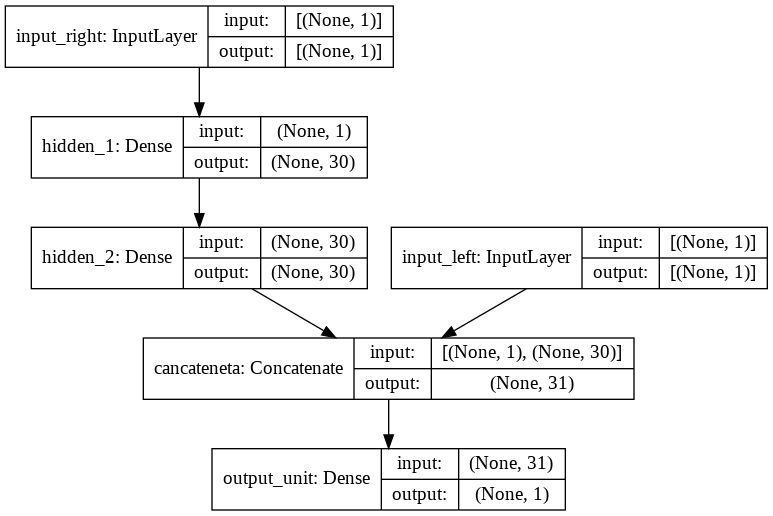

In [14]:
plot_model(model , to_file="complex_model.png" , show_shapes= True , show_layer_names=True)

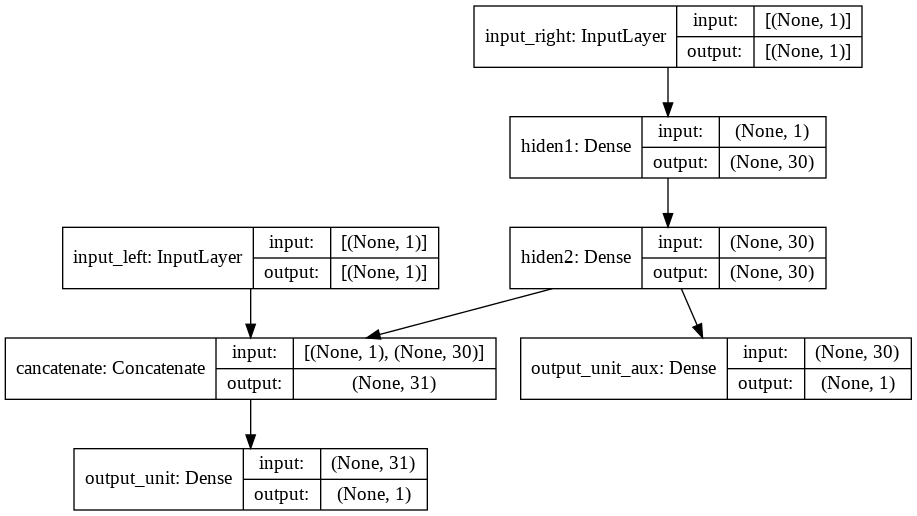

In [15]:
input_r = Input(shape = (1,) , name="input_right")
input_l = Input(shape = (1,) , name="input_left")
hidden1 = Dense(30 , activation='relu' , name="hiden1")(input_r)
hidden2 = Dense(30 , activation='relu' , name="hiden2")(hidden1)
concat  = concatenate([input_l , hidden2] , name="cancatenate")
output  = Dense(1 , name = "output_unit")(concat)
output_aux = Dense(1 , name = "output_unit_aux")(hidden2)

model = Model(inputs = [input_l , input_r] , outputs = [output , output_aux])
plot_model(model , to_file="complex_model_twoOutput.png" , show_shapes= True , show_layer_names=True)


In [22]:
class MyOwnModel(Model):
    def __init__(self,units = 30 , activation = "relu" , **kwargs):
        super().__init__()
        self.hidden1 = Dense(units , activation=activation , name="hidden1")
        self.hidden2 = Dense(units , activation=activation , name="hidden2")
        self.main_output = Dense(1)
        self.aux_output = Dense(1)
    def call(self , inputs):
        input_l , input_r = inputs
        hidden1 = self.hidden1(input_r)
        hidden2 = self.hidden2(hidden1)
        concat = concatenate([input_l , hidden2])
        main_output = self.main_output(concat)
        aux_output  = self.aux_output(hidden2)
        return main_output , aux_output

model = MyOwnModel()

In [ ]:
#plot_model(MyOwnModel, to_file="complex_model_twoOutput.png" , show_shapes= True , show_layer_names=True)